In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Carga de archivo
# Correr la siguiente instruccion solo si lo planean correr en Colab
#os.chdir("/content")
raw_data = pd.read_csv("./reto_precios.csv")

In [ ]:
raw_data.shape

(981, 35)

In [ ]:
raw_data.head()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,...,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},...,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417


A simple vista, tenemos muchas variables que, ya sea porque son la concatenación de otras o por su naturaleza, no nos explican mucho o agregan mucho. También, variables como main_name o link de entrada se aprecia que no son muy prometedoras. Otras, como location, podrían limpiarse para obtener la colonia a la que pertenecen los departamentos, lo cual, intuitivamente puede resultar en una variable interesante.



In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

De entrada, sin ir más profundo en el análisis una a una, variables como orientation, floor_situated, disposition, cellars, num_floors, etc. no parece que nos vayan a servir. El problema es que son tan pocos datos y tan específicos que ningun proceso de Data Imputation parece que pueda ser útil. ¿Hace sentido llenar, por ejemplo, los null de orientation con la moda? Por supuesto que no. Otras como amenities, quizás las podríamos llenar utilizando K-Means Imputation, pero implicará un análisis más profundo del problema. 

In [ ]:
raw_data.describe()

,id,lat,lon,price_mod,since_value,days_on_site,amenities,age_in_years,bathrooms,cellars,num_floors,apartments_per_floor,parking_lots,floor_situated,num_bedrooms,m2,final_price,price_square_meter
count,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,504.000000,981.0,981.000000,52.000000,84.000000,15.000000,981.000000,24.000000,981.000000,981.000000,9.810000e+02,981.000000
mean,494.465851,19.654796,-99.222834,6.144620e+06,15.589195,103.478084,4.081349,0.0,1.970438,1.019231,3.607143,3.000000,1.331295,1.916667,2.103976,111.824608,6.144620e+06,61048.999248
std,284.137165,1.244009,0.608650,2.907089e+06,16.551510,116.789698,1.264019,0.0,0.887638,0.138675,2.789904,1.647509,0.481631,1.348644,0.627104,231.604294,2.907089e+06,19327.439701
min,1.000000,19.360533,-117.063962,6.342170e+05,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,6.342170e+05,582.246879
25%,250.000000,19.405824,-99.165172,4.330000e+06,3.000000,31.000000,4.000000,0.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,75.000000,4.330000e+06,52294.117647
50%,495.000000,19.411515,-99.163637,5.511689e+06,7.000000,59.000000,4.000000,0.0,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,93.000000,5.511689e+06,61271.466667
75%,740.000000,19.419526,-99.161332,7.700000e+06,31.000000,120.000000,5.000000,0.0,2.000000,1.000000,5.000000,4.000000,2.000000,2.250000,2.000000,129.000000,7.700000e+06,70175.438596
max,985.000000,32.528726,-99.128642,2.233000e+07,59.000000,730.000000,8.000000,0.0,23.000000,2.000000,12.000000,7.000000,3.000000,5.000000,4.000000,7210.000000,2.233000e+07,150514.818182


Veamos los valores únicos

In [ ]:
for c in raw_data.columns:
  un = raw_data[c].unique()
  if len(un) <= 10:
    print(f'{c} valores únicos: {un}')

subtitle valores únicos: ['Departamento en venta']
timestamp valores únicos: ['2022-03-29']
price_currency valores únicos: ['pesos']
since_period valores únicos: ['days' 'months' 'years']
amenities valores únicos: [ 3.  2. nan  4.  5.  6.  7.  8.  1.]
age_in_years valores únicos: [0.]
bathrooms valores únicos: [ 2.  1.  3.  5.  4. 23.]
cellars valores únicos: [nan  2.  1.]
apartments_per_floor valores únicos: [nan  2.  7.  3.  4.  1.  5.]
disposition valores únicos: ['Contrafrente' nan 'Frente' 'Interno']
parking_lots valores únicos: [2 1 3]
floor_situated valores únicos: [nan  1.  3.  2.  4.  5.]
orientation valores únicos: [nan 'Oeste' 'Sur' 'Poniente' 'Norte' 'Oriente']
num_bedrooms valores únicos: [2. 1. 3. 4.]
department_type valores únicos: [nan 'Loft']


Variables como subtitle, timestamp, price_currency, age_in_years no nos van a decir nada, así que se van.

In [ ]:
raw_data.drop(['subtitle','timestamp',
               'price_currency','age_in_years'], axis = 1,
              inplace = True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   link                  981 non-null    object 
 2   location              981 non-null    object 
 3   price                 981 non-null    object 
 4   attributes            981 non-null    object 
 5   id                    981 non-null    int64  
 6   address               702 non-null    object 
 7   since                 981 non-null    object 
 8   description           981 non-null    object 
 9   vendor                981 non-null    object 
 10  lat                   981 non-null    float64
 11  lon                   981 non-null    float64
 12  price_mod             981 non-null    float64
 13  since_period          981 non-null    object 
 14  since_value           981 non-null    int64  
 15  days_on_site          9

- No hay nada que podamos hacer para imputar el tipo de departamento (son 39 Lofts, los demás son Duplex? Penthouse? Gaden?... sin más conocimiento del problema (y en el sitio web no dejan ver esa cotegoría a menos que registres un departamente) no podemos inputar nada.

- Ninguna técnica de imputación haría sentido para la variable orientación, ¿qué características de las que tenemos sirven como proxy para la orientación? Ninguna técnica más avanzada serviría, menos con solo 8 datos.

- Lo mismo con floor_located y disposition. 

In [ ]:
raw_data.drop(['department_type','orientation',
               'floor_situated','disposition'], axis = 1,
              inplace = True)

In [ ]:
raw_data.shape

(981, 27)

In [ ]:
raw_data['main_name'].unique()

array(['Departamento - Roma Norte',
       'Preventa Exclusiva · Terraloza Roma Norte ·',
       'Townhouse Único En La Roma Sur',
       'Departamento En Roma Sur, Cuauhtémoc Con 2 Recámaras, 93 M², Id: 40395',
       'Últimos Deptos En Preventa En Roma Norte',
       'Venta Departamento Nuevo Chilpancingo',
       'Departamento En Venta, Roma Sur, Cuauhtemoc',
       'Departamento En Roma Norte, Cuauhtémoc Con 3 Recámaras, 154 M², Id: 41504',
       'Excelente Depto Condominio Cine México',
       'Departamento Con Terraza En La Colonia Roma Sur En Venta',
       'Se Vende Departamento En Roma Sur Terraza',
       'Se Vende Departamento Doble Altura En Roma Sur',
       'Se Vende Departamento En Roma Sur',
       'Se Vende Departamento En Roma Sur Con Jardín',
       'Inversión Departamento Venta Roma Sur',
       'Departamento Unico En Venta En Roma Sur: Sabor A Mi',
       'Loft  En Preventa  A Una Cuadra De Las Cibeles',
       'Departamento Preventa  A Una Cuadra De Las Cibeles',

In [ ]:
raw_data['link'].unique()

array(['https://departamento.metroscubicos.com/MLM-1396247803-departamento-roma-norte-_JM#position=1&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b',
       'https://departamento.metroscubicos.com/MLM-1394878121-preventa-exclusiva-terraloza-roma-norte--_JM#position=2&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b',
       'https://departamento.metroscubicos.com/MLM-1396878867-townhouse-unico-en-la-roma-sur-_JM#position=3&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b',
       'https://departamento.metroscubicos.com/MLM-1323165152-departamento-en-roma-sur-cuauhtemoc-con-2-recamaras-93-m-id-40395-_JM#position=4&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b',
       'https://departamento.metroscubicos.com/MLM-1374256918-ultimos-deptos-en-preventa-en-roma-norte-_JM#position=5&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b',
       'http

- Main_name, link e id no nos dicen nada a menos que con main_name hagamos algo de word2vec, embeddings, etc.

In [ ]:
raw_data.drop(['main_name','link'], axis = 1,
              inplace = True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              981 non-null    object 
 1   price                 981 non-null    object 
 2   attributes            981 non-null    object 
 3   id                    981 non-null    int64  
 4   address               702 non-null    object 
 5   since                 981 non-null    object 
 6   description           981 non-null    object 
 7   vendor                981 non-null    object 
 8   lat                   981 non-null    float64
 9   lon                   981 non-null    float64
 10  price_mod             981 non-null    float64
 11  since_period          981 non-null    object 
 12  since_value           981 non-null    int64  
 13  days_on_site          981 non-null    float64
 14  amenities             504 non-null    float64
 15  bathrooms             9

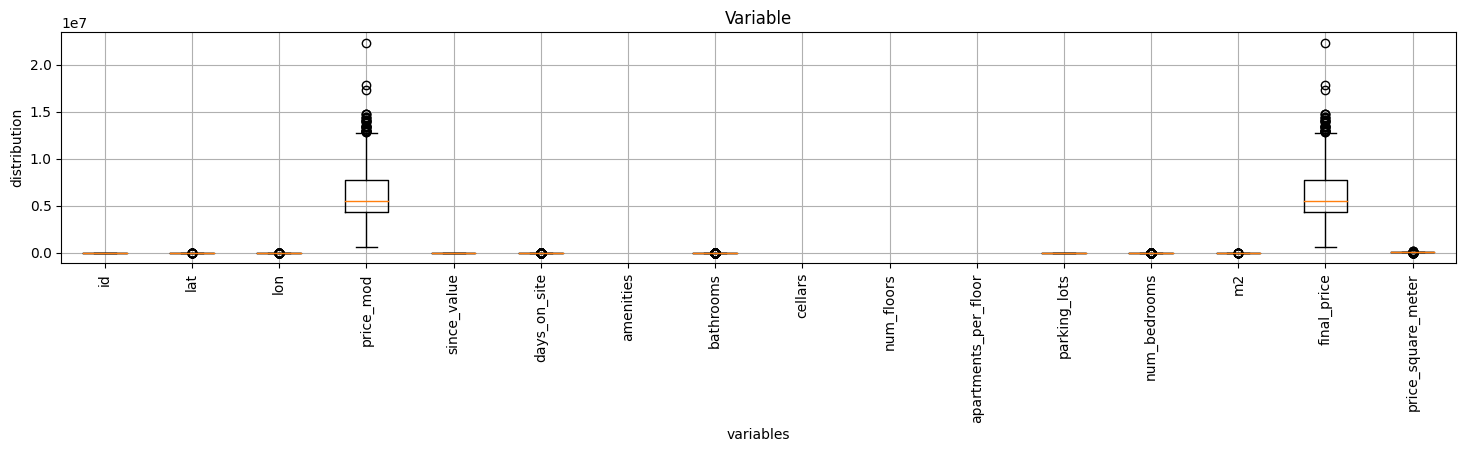

In [ ]:
plt.figure(figsize=(18, 3))

numeric_data = raw_data.select_dtypes(include=['int64', 'float64'])
plt.title('Variable')
plt.boxplot(numeric_data, labels=numeric_data.columns)
plt.xticks(rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

¿Si tenemos el precio final y los m2? ¿Para qué queremos este modelo entonces?

In [ ]:
raw_data['price_m2_test'] = (raw_data['final_price']/raw_data['m2']) - raw_data['price_square_meter']

In [ ]:
raw_data['price_m2_test'].describe()
raw_data.drop('price_m2_test', axis = 1, inplace=True)

In [ ]:
raw_data[['price', 'price_mod']].head()

,price,price_mod
0,9000000 pesos,9000000.0
1,4264000 pesos,4264000.0
2,8093500 pesos,8093500.0
3,4000000 pesos,4000000.0
4,6732700 pesos,6732700.0


In [ ]:
raw_data[['attributes','num_bedrooms','m2']].head()

,attributes,num_bedrooms,m2
0,"127 m² construidos,2 recs.",2.0,127.0
1,"54 m² construidos,1 rec.",1.0,54.0
2,"163 m² construidos,3 recs.",3.0,163.0
3,"93 m² construidos,2 recs.",2.0,93.0
4,"103 m² construidos,2 recs.",2.0,103.0


In [ ]:
raw_data['since_period'].unique()
periodos = {'days': 1, 'months': 30, 'years': 365}

raw_data['total_days'] = raw_data['since_period'].map(periodos)

raw_data['since_days'] = raw_data['since_value'] * raw_data['total_days']
raw_data['days_test'] = raw_data['since_days']-raw_data['days_on_site']

In [ ]:
raw_data['days_test'].describe()
raw_data.drop('days_test', axis = 1, inplace=True)

Con lo anterior vemos que precio por metro cuadrado, price_mod, price, since_period, since_value y attributes son variables que no nos aportan algo nuevo que otras variables numéricas no hagan ya. 

In [ ]:
raw_data.drop(['price', 'price_mod', 'price_square_meter',
          'since_period', 'since_value', 'attributes', 'since_days',
          'total_days', 'id'], axis = 1,
         inplace = True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              981 non-null    object 
 1   address               702 non-null    object 
 2   since                 981 non-null    object 
 3   description           981 non-null    object 
 4   vendor                981 non-null    object 
 5   lat                   981 non-null    float64
 6   lon                   981 non-null    float64
 7   days_on_site          981 non-null    float64
 8   amenities             504 non-null    float64
 9   bathrooms             981 non-null    float64
 10  cellars               52 non-null     float64
 11  num_floors            84 non-null     float64
 12  monthly_fee           128 non-null    object 
 13  apartments_per_floor  15 non-null     float64
 14  parking_lots          981 non-null    int64  
 15  num_bedrooms          9

Para Latitud y Longitud no es muy explicativo ver su distribución, al menos no para el ojo poco entrenado como el mío, entonces voy a hacer un choropleth (abuso de terminología, pero no tengo otro nombre).

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Fuente del Shapefile: https://www.efrainmaps.es/descargas-gratuitas/m%C3%A9xico/
mexico = gpd.read_file('/content/México_Estados.shx')

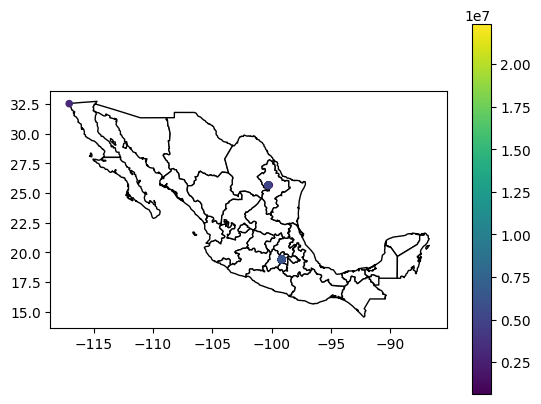

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(raw_data['lon'], raw_data['lat'])]
geo_df = GeoDataFrame(raw_data, geometry=geometry)

fig, ax = plt.subplots()
mexico.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, markersize=20, column='final_price', legend=True)
plt.show()

Ahora se ve mucho más claro que tenemos datos en la CDMX, Nuevo León y Baja California, hace sentido hacer un query con regex para agregar una columna de Estado.

¿Podemos extraer información valiosa de la variable location? Tengo la sospecha de que lo que está entre la primera y segunda coma es la colonia
Si no es el caso para todos (no tendría porque serlo) aún así podemos extrar una lista aproximada de las colonias en el dataset

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import unidecode

# Más facil manejar todo en minusculas, sin acentos y controlando los espacios, al no ser
# campos uniformes, tenemos una columna muy sucia, parece que cada quien que publica su 
# departamento debe ingresar a mano la direccion.
raw_data['location'] = (raw_data['location'].apply(lambda x: unidecode. #unidecode sirve para limpiar los acentos
                                                   unidecode(x.lower(). #con lower nos hacemos la vida más fácil al trabajar en minusculas
                                                             strip()))) #con strip controlamos los espacios antes y después

raw_data['colonia'] = (raw_data['location']
                       .apply(lambda x: 
                              re.search(',(.*?),', x).group(1).strip() # quédate con TODO (incluyendo espacios)entre las primeras dos comas
                              if re.search(',(.*?),', x) #checa que exista algo entre las dos primeras comas
                              else np.nan)) #si no, nan y nos clavamos bien

raw_data['Estado'] = (raw_data['location']
                      .apply(lambda x: re.#utilizamos regex
                             search('(distrito federal|distrito federal|nuevo leon|nuevo león|baja california|distrito federal)', #sustituye por esto
                                    x).group() if re
                             .search('(distrito federal|cdmx|nuevo leon|nuevo leon|baja california|ciudad de mexico)', #busca estas formas de escribir el estaod
                                     x) else np.nan)) #si no está esa forma de escribir el estado, nos pone NaN y hacemos deep dive

In [ ]:
raw_data['Estado'].value_counts()

distrito federal    938
nuevo leon           36
baja california       7
Name: Estado, dtype: int64

In [ ]:
raw_data['colonia'].value_counts()

roma norte                 335
roma sur                   290
cuauhtemoc                 287
roma                        14
monterrey                   11
roma privada                 6
benito juarez                1
ciudad de mexico             1
zona distrito tec (vav)      1
tijuana                      1
conocida                     1
del valle centro             1
Name: colonia, dtype: int64

El tema de estados promete bastante, vamos a clavarnos más en el de colonia para entender todas las demás y ver si podemos hacer algo con ellas

In [ ]:
dummy = raw_data[~raw_data['colonia'].isin(['roma norte', 'roma sur'])]
dummy['location'].unique()

array(['roma sur, cuauhtemoc, distrito federal',
       'roma norte, cuauhtemoc, distrito federal',
       'cuauhtemoc, distrito federal',
       'alejandria 111, roma, monterrey, nuevo leon',
       'narvarte, benito juarez, distrito federal',
       'roma norte, ciudad de mexico, cdmx, mexico, roma norte, cuauhtemoc, distrito federal',
       '2 de abril 2007, roma, monterrey, nuevo leon',
       'departamentos nuevos roma norte coahuila, cuauhtemoc, distrito federal',
       'queretaro, cuauhtemoc, distrito federal',
       'departamentos en preventa av. eugenio garza sada, zona distrito tec (vav), roma, monterrey, nuevo leon',
       'roma privada, roma privada, monterrey, nuevo leon',
       'roma, monterrey, nuevo leon', 'roma sur, monterrey, nuevo leon',
       '2 de abril- jesus dionisio gonzalez, roma, monterrey, nuevo leon',
       'departamentos en preventa zona tec monterrey, roma, monterrey, nuevo leon',
       'puebla 277 roma norte, cuauhtemoc, distrito federal',
       

Con esto ya se puede hacer un diccionario para sustituciones, porque ya no hay un patrón tan claro:

In [ ]:
colonias = {
    "\\bcondesa\\b":"condesa",
    "\\broma, monterrey\\b": "roma",
    "\\bprivada roma\\b": "roma",
    "\\broma sur, monterrey\\b": "roma",
    "\\broma privada\\b":"roma",
    "\\broma norte\\b": "roma norte",
    "\\broma sur\\b": "roma_sur",
    "\\bqueretaro\\b": "queretaro",
    "\\bhermosillo\\b": "hermosillo",
    "\\bcuauhtemoc\\b": None,
    "\\bnarvarte\\b": "narvarte",
    "\\bdel valle\\b": "del valle",
    "\\bbaja california\\b":"baja california",
    "\\bbenito juarez\\b":None
}

In [ ]:
raw_data['colonia'] = raw_data['location']

for old_word, new_word in colonias.items():
    mask = raw_data['colonia'].str.contains(old_word, case=False, na=False)
    raw_data.loc[mask, 'colonia'] = new_word

In [ ]:
raw_data['Estado'].value_counts()

distrito federal    938
nuevo leon           36
baja california       7
Name: Estado, dtype: int64

In [ ]:
raw_data['colonia'].value_counts()

roma norte         504
roma_sur           397
roma                36
queretaro            5
condesa              2
narvarte             1
baja california      1
del valle            1
hermosillo           1
Name: colonia, dtype: int64

In [ ]:
umbral = 7

value_counts = raw_data['colonia'].value_counts()

to_replace = value_counts[value_counts < umbral].index

raw_data.loc[raw_data['colonia'].isin(to_replace), 'colonia'] = 'otra'

In [ ]:
raw_data['colonia'].value_counts()

roma norte    504
roma_sur      397
roma           36
otra           11
Name: colonia, dtype: int64

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              981 non-null    object 
 1   address               702 non-null    object 
 2   since                 981 non-null    object 
 3   description           981 non-null    object 
 4   vendor                981 non-null    object 
 5   lat                   981 non-null    float64
 6   lon                   981 non-null    float64
 7   days_on_site          981 non-null    float64
 8   amenities             504 non-null    float64
 9   bathrooms             981 non-null    float64
 10  cellars               52 non-null     float64
 11  num_floors            84 non-null     float64
 12  monthly_fee           128 non-null    object 
 13  apartments_per_floor  15 non-null     float64
 14  parking_lots          981 non-null    int64  
 15  num_bedrooms          9

In [ ]:
raw_data.loc[raw_data['Estado'] == 'baja california', 'colonia'] = 'baja california'
raw_data['colonia'].value_counts()

roma norte         504
roma_sur           391
roma                36
otra                10
baja california      7
Name: colonia, dtype: int64

In [ ]:
raw_data.loc[raw_data['colonia'].isnull(), 'location']

45                 cuauhtemoc, distrito federal
112                cuauhtemoc, distrito federal
117                cuauhtemoc, distrito federal
164                cuauhtemoc, distrito federal
219                cuauhtemoc, distrito federal
351                cuauhtemoc, distrito federal
467                cuauhtemoc, distrito federal
469                cuauhtemoc, distrito federal
473                cuauhtemoc, distrito federal
559                cuauhtemoc, distrito federal
658                cuauhtemoc, distrito federal
702             benito juarez, distrito federal
703                cuauhtemoc, distrito federal
704                cuauhtemoc, distrito federal
715                cuauhtemoc, distrito federal
776                cuauhtemoc, distrito federal
805                cuauhtemoc, distrito federal
809                cuauhtemoc, distrito federal
816                cuauhtemoc, distrito federal
839                cuauhtemoc, distrito federal
842                cuauhtemoc, distrito 

¿Cómo tratamos los datos Nulos en los que solo tenemos su delegación? Un approach sería hacerle un K-Means Imputation.Usando las columna de lat, lon, Estado y Precio, llenaré las columnas None con aquellas a las que más se parecen. Las None son casi todas en la cuauhtemoc, por lo que si se les asigna roma norte o sur, no estamos haciendo nada muy raro, lo mismo con la benito juarez que está bastante cerca.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder() # Nuestra columna de estados es una columna categórica
raw_data['Estado_encoded'] = encoder.fit_transform(raw_data[['Estado']])

#Nuestro problem domain y dataset nos da 5 clústers en los que podría caer
kmeans = KMeans(n_clusters=5) #Las 5 categorías que tenemos: baja california, roma nuevo leon, roma N, roma S, Otra
labels = kmeans.fit_predict(raw_data[['lat', 'lon', 'Estado_encoded', 'final_price']])

raw_data['Colonia_KMeans'] = labels

#Agregamos la moda como etiqueta de Colonia
label_colonia = {}
for label in set(labels):
    colonia = raw_data.loc[raw_data['Colonia_KMeans'] == label, 'colonia'].mode().iloc[0]
    label_colonia[label] = colonia

raw_data.loc[raw_data['colonia'].isnull(), 'colonia'] = (raw_data
                                                         .loc[raw_data['colonia'].isnull(),
                                                              'Colonia_KMeans'].map(label_colonia))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
raw_data['colonia'].value_counts()

roma norte         536
roma_sur           392
roma                36
otra                10
baja california      7
Name: colonia, dtype: int64

In [ ]:
precio_por_colonia = raw_data.groupby('colonia')['final_price'].mean().sort_values(ascending=False)
precio_por_colonia

colonia
otra               8.293325e+06
roma_sur           6.587216e+06
roma norte         5.928434e+06
baja california    4.701429e+06
roma               4.227759e+06
Name: final_price, dtype: float64

In [ ]:
precio_por_estado = raw_data.groupby('Estado')['final_price'].mean().sort_values(ascending=False)
precio_por_estado

Estado
distrito federal    6.228958e+06
baja california     4.701429e+06
nuevo leon          4.227759e+06
Name: final_price, dtype: float64

In [ ]:
raw_data.columns

Index(['location', 'address', 'since', 'description', 'vendor', 'lat', 'lon',
       'days_on_site', 'amenities', 'bathrooms', 'cellars', 'num_floors',
       'monthly_fee', 'apartments_per_floor', 'parking_lots', 'num_bedrooms',
       'm2', 'final_price', 'colonia', 'Estado', 'Estado_encoded',
       'Colonia_KMeans'],
      dtype='object')

In [ ]:
raw_data.drop(['location', 'address',
               'since','Estado_encoded', 'Colonia_KMeans'], 
              axis = 1, inplace = True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   description           981 non-null    object 
 1   vendor                981 non-null    object 
 2   lat                   981 non-null    float64
 3   lon                   981 non-null    float64
 4   days_on_site          981 non-null    float64
 5   amenities             504 non-null    float64
 6   bathrooms             981 non-null    float64
 7   cellars               52 non-null     float64
 8   num_floors            84 non-null     float64
 9   monthly_fee           128 non-null    object 
 10  apartments_per_floor  15 non-null     float64
 11  parking_lots          981 non-null    int64  
 12  num_bedrooms          981 non-null    float64
 13  m2                    981 non-null    float64
 14  final_price           981 non-null    float64
 15  colonia               9

In [ ]:
cols = ['cellars', 'num_floors', 'monthly_fee',
       'apartments_per_floor']
for c in cols:
  print(c, raw_data[c].unique())

cellars [nan  2.  1.]
num_floors [ 1. nan  3.  4.  7.  5.  9.  2.  6. 12. 10.]
monthly_fee ['0 MXN' nan '853 MXN' '800 MXN' '1 MXN' '3700 MXN' '2000 MXN' '1200 MXN'
 '2500 MXN' '4 MXN' '4000 MXN' '1500 MXN' '2900 MXN' '3900 MXN' '3000 MXN']
apartments_per_floor [nan  2.  7.  3.  4.  1.  5.]


No tenemos suficiente información ni hace mucho sentido hacer imputación de estas variables (quizá de cellar sí), así que igual las limpiamos.

In [ ]:
raw_data.drop(['num_floors', 'monthly_fee',
       'apartments_per_floor'], axis=1, inplace = True)

Tenemos tan pocos datos y la augmentation no está tan clara sin conocimiento de cómo registra los datos el vendedor. No podemos hacer augmentation de numero de pisos, apartment_per_floor ni floor_situated porque tenemos muy muy poquitos datos como para tomar una decisión, además de que lógicamente no hace sentido ninguna técnica de imputación de datos en nuestro problem domain. 

Department Type se podría imputar si fuera una variable binaria, pero no solo existen los Lofts, también hay Duplex, Penthouse, Con Jardín, etc. No solo Lofts y Flats.

Cellars y Amenities pueden imputarse con el promedio o con ceros, podemos probar haciendo un clustering y llenando con el promedio del cluster o con fillna(). Pero tenemos tan poquitos datos en cellar que esto podría meter demasiado ruido, entonces vamos a hacerlo únicamente con amenities.

Una idea antes de eliminar e imputar (aunque habría que considerar distancia de palabras, sinónimos, faltas de ortografía o algo similar para que funcione) es ver si, a través de la descripción, podemos obtener algo de información relevante.

In [ ]:
import re

cellar_words = ['bodega', 'bodegas', 'depositos', 'almacenamiento', 'despensa']

amenity_words = [
    'rampa para silla de ruedas', 'chimenea', 'con area verde', 'cancha de basquetbol',
    'cancha de paddle', 'canchas de usos multiples', 'sauna', 'refrigerador',
    'con cancha de futbol', 'business center', 'acceso a internet', 'gimnasio',
    'salon de usos multiples', 'ascensor', 'estacionamiento para visitantes',
    'cancha de tenis', 'laundry', 'salon de fiestas', 'area de juegos infantiles',
    'area de cine', 'roof garden'
]

raw_data['description'] = raw_data['description'].str.lower()
raw_data['description'] = raw_data['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

raw_data['cellars_by_description'] = raw_data['description'].apply(
    lambda x: 1 if any(re.search(r'\b{}\b'.format(word), x) for word in cellar_words) else 0
)

raw_data['amenity_by_description'] = raw_data['description'].apply(
    lambda x: sum(1 for word in amenity_words if re.search(r'\b{}\b'.format(word), x))
)

In [ ]:
raw_data['cellars_by_description'].unique()

array([0, 1])

In [ ]:
raw_data['amenity_by_description'].unique()

array([1, 2, 0, 3, 4])

In [ ]:
raw_data['amenity_test'] = raw_data['amenities'] - raw_data['amenity_by_description']
raw_data['cellar_test'] = raw_data['cellars'] - raw_data['cellars_by_description']

In [ ]:
raw_data['amenity_test'].describe()

count    504.000000
mean       3.279762
std        1.569816
min       -2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: amenity_test, dtype: float64

In [ ]:
raw_data['cellar_test'].describe()

count    52.000000
mean      0.634615
std       0.486236
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: cellar_test, dtype: float64

Aunque cellar no salió tan mal, ni cellar ni amenities puede ser extraído, al menos como sugerí yo, de "descrito".

In [ ]:
raw_data.drop(['description', 'cellars',
               'cellars_by_description', 'amenity_by_description',
               'amenity_test', 'cellar_test'], axis=1, inplace=True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vendor        981 non-null    object 
 1   lat           981 non-null    float64
 2   lon           981 non-null    float64
 3   days_on_site  981 non-null    float64
 4   amenities     504 non-null    float64
 5   bathrooms     981 non-null    float64
 6   parking_lots  981 non-null    int64  
 7   num_bedrooms  981 non-null    float64
 8   m2            981 non-null    float64
 9   final_price   981 non-null    float64
 10  colonia       981 non-null    object 
 11  Estado        981 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 92.1+ KB


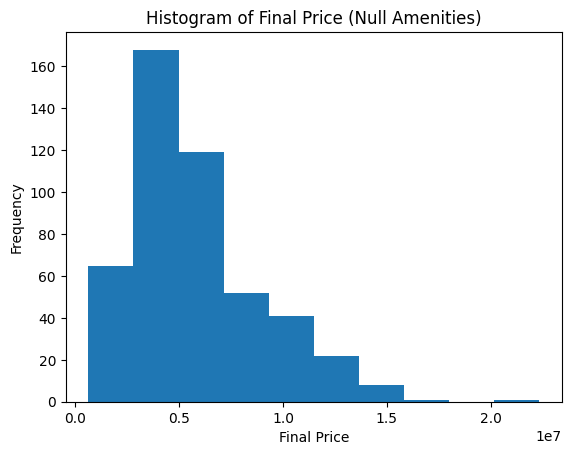

In [ ]:
null_amenities = raw_data[raw_data['amenities'].isnull()]

price_null_amenities = null_amenities['final_price']

plt.hist(price_null_amenities, bins=10)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Histogram of Final Price (Null Amenities)')
plt.show()

Aunque seguramente deben de haber formas de imputar datos para la columna de amenities por su distribución, la auiqtaremos.

In [ ]:
raw_data.dropna(inplace=True)

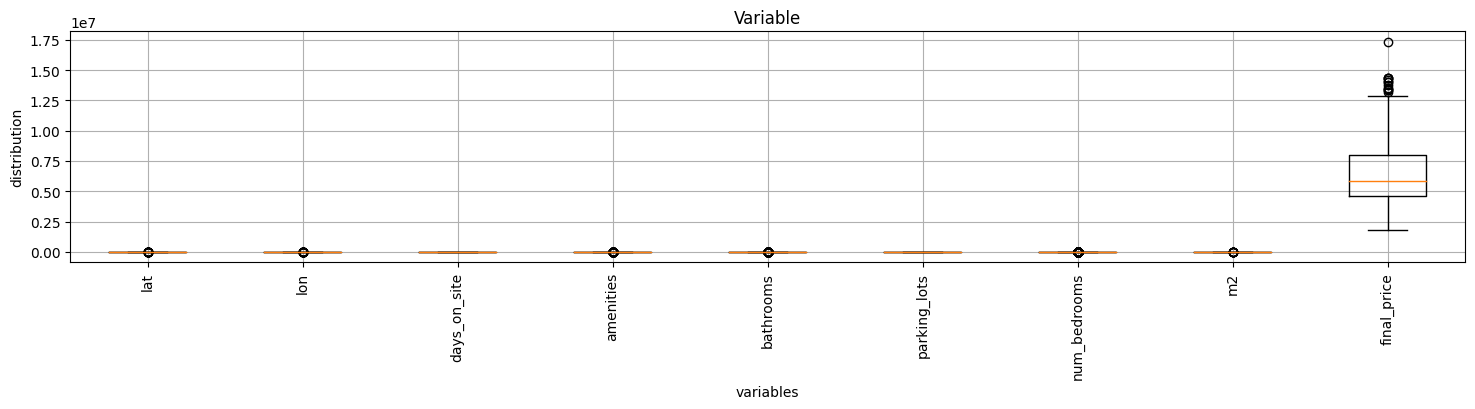

In [ ]:
plt.figure(figsize=(18, 3))

numeric_data = raw_data.select_dtypes(include=['int64', 'float64'])
plt.title('Variable')
plt.boxplot(numeric_data, labels=numeric_data.columns)
plt.xticks(rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

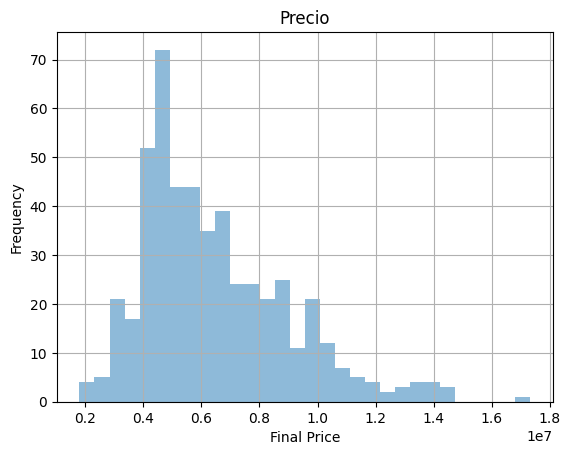

Skewness: 1.002543773505907
Kurtosis: 0.9242623515709605


In [ ]:
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.hist(raw_data['final_price'], bins=30, alpha=0.5)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Precio')
plt.grid(True)
plt.show()

skewness = skew(raw_data['final_price'])
kurt = kurtosis(raw_data['final_price'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

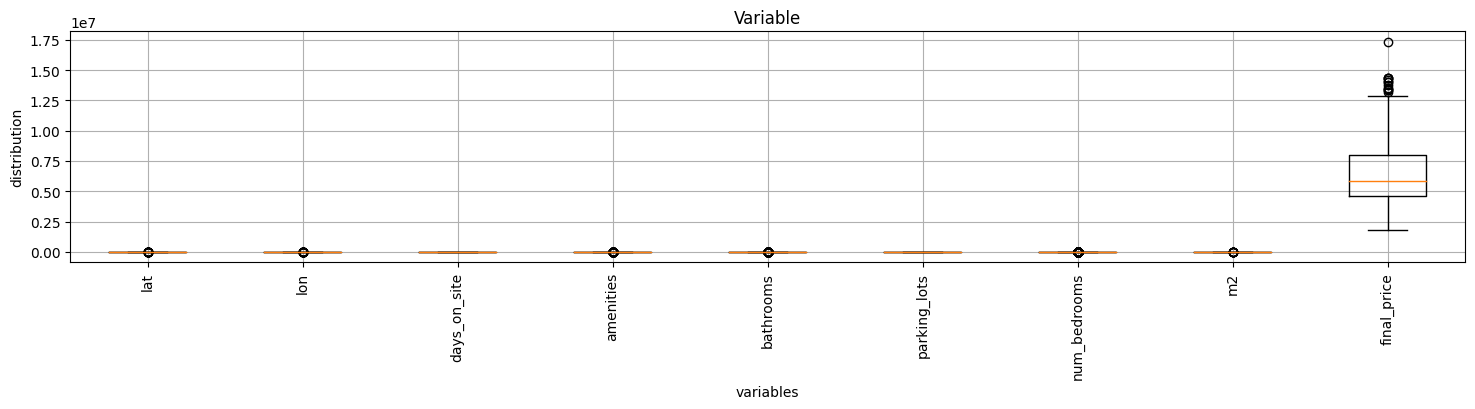

In [ ]:
plt.figure(figsize=(18, 3))

numeric_data = raw_data.select_dtypes(include=['int64', 'float64'])
plt.title('Variable')
plt.boxplot(numeric_data, labels=numeric_data.columns)
plt.xticks(rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

In [ ]:
raw_data.shape

(504, 12)

<ipython-input-631-2bb3f6a699d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot=True, cmap="crest")


<Axes: >

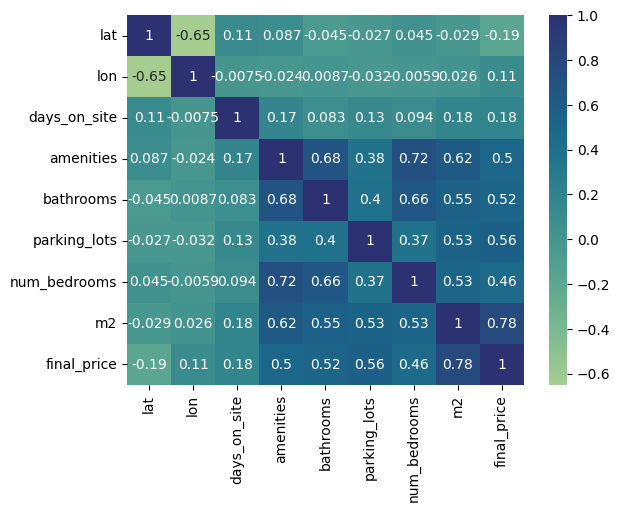

In [ ]:
sns.heatmap(raw_data.corr(), annot=True, cmap="crest")

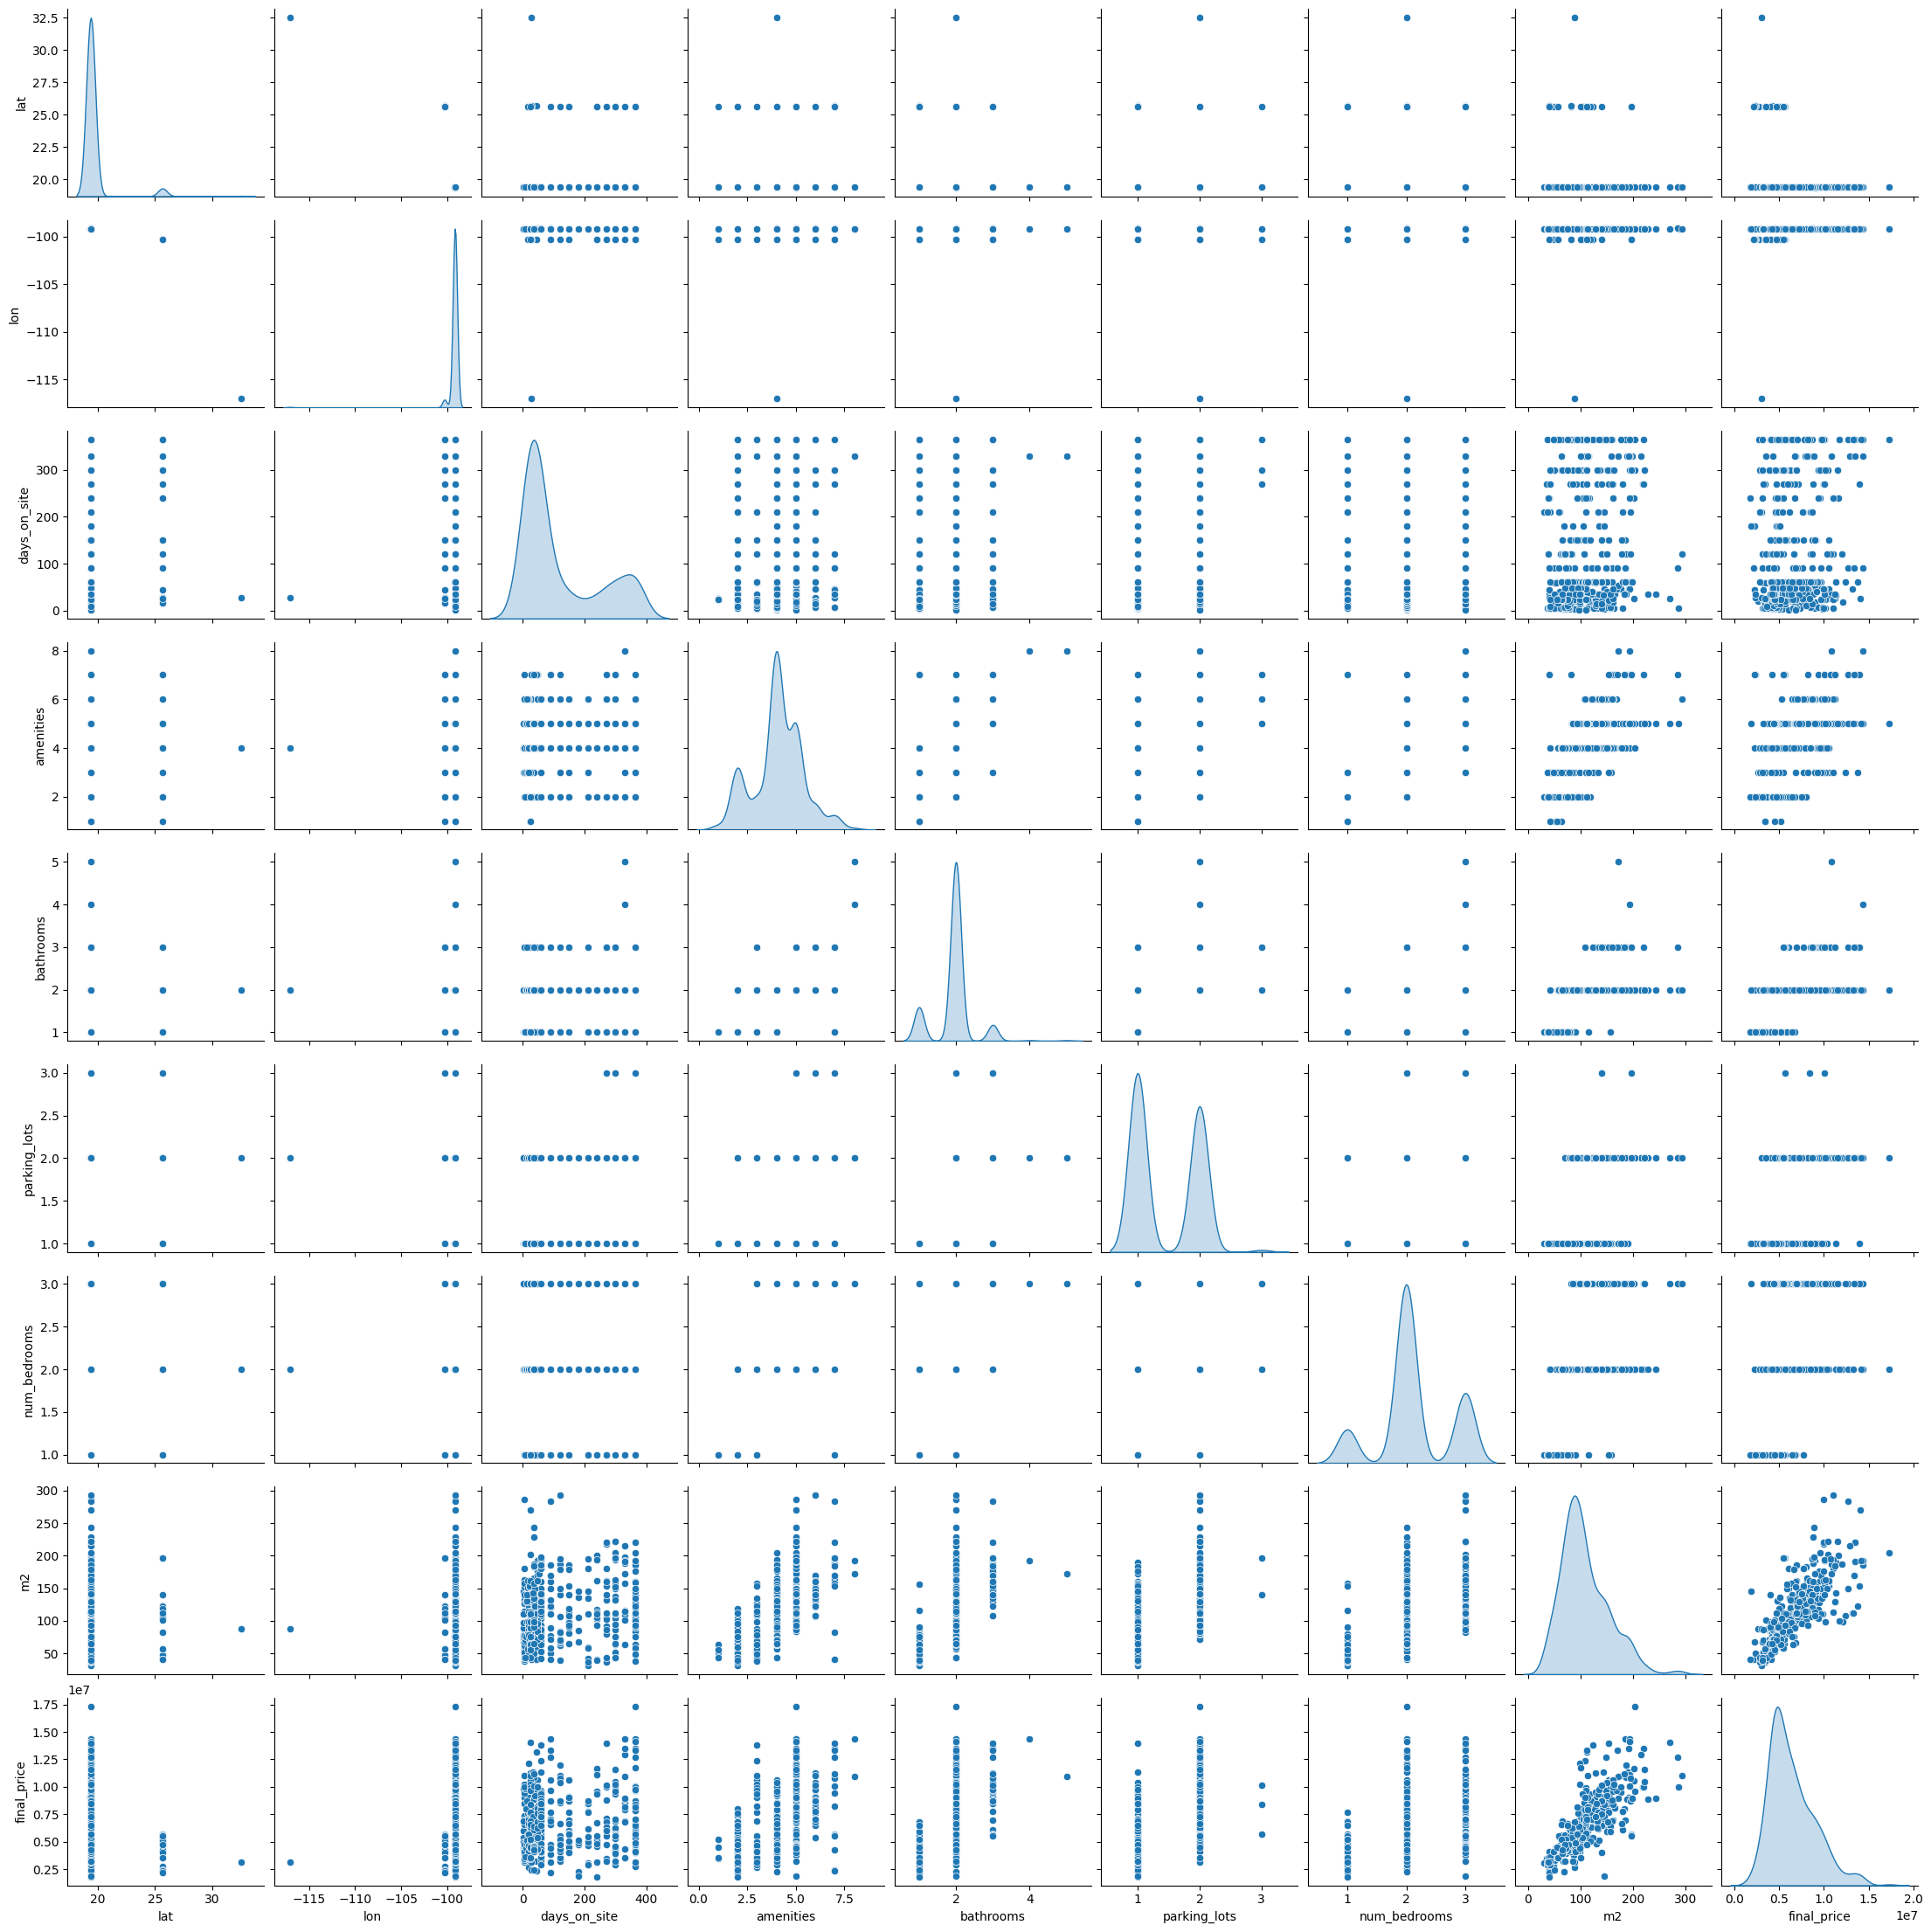

In [ ]:
sns.pairplot(data=raw_data, diag_kind='kde')

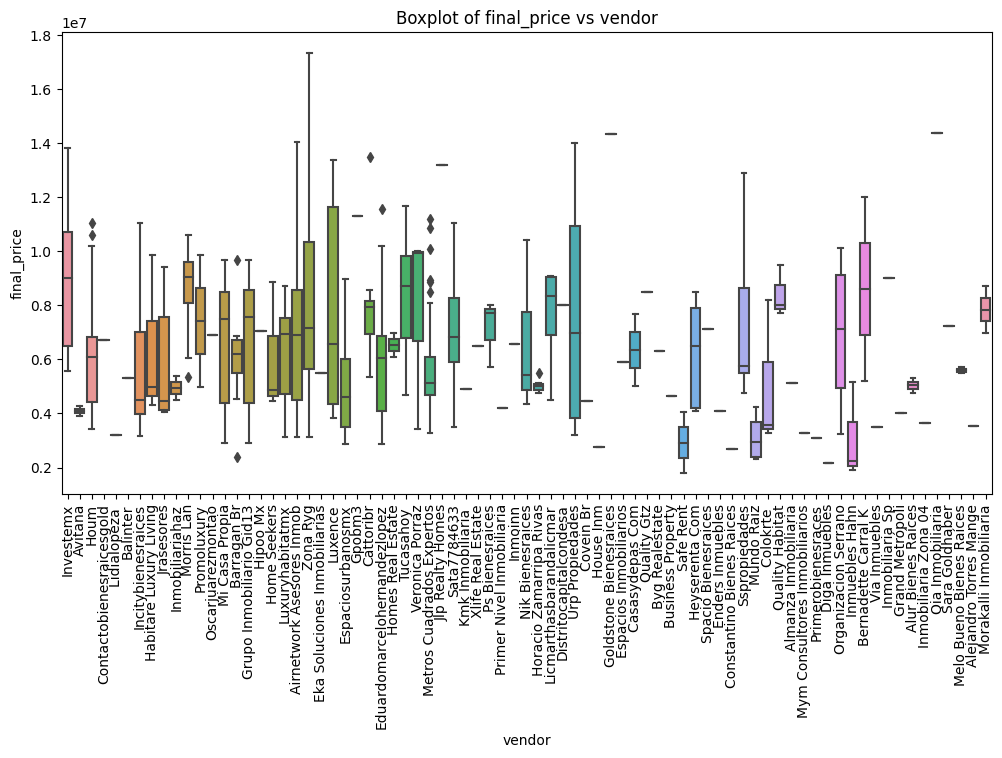

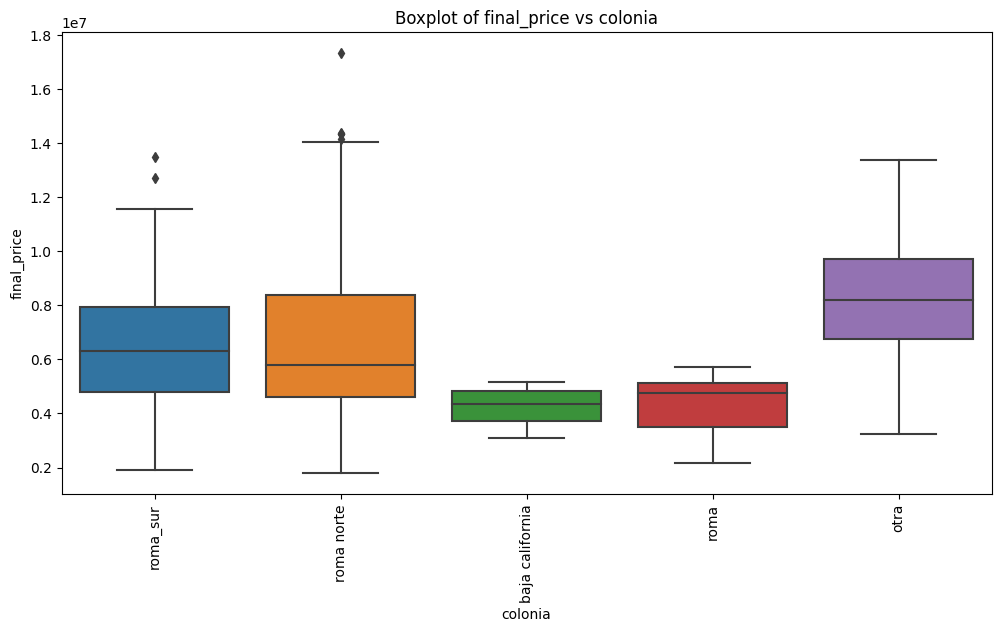

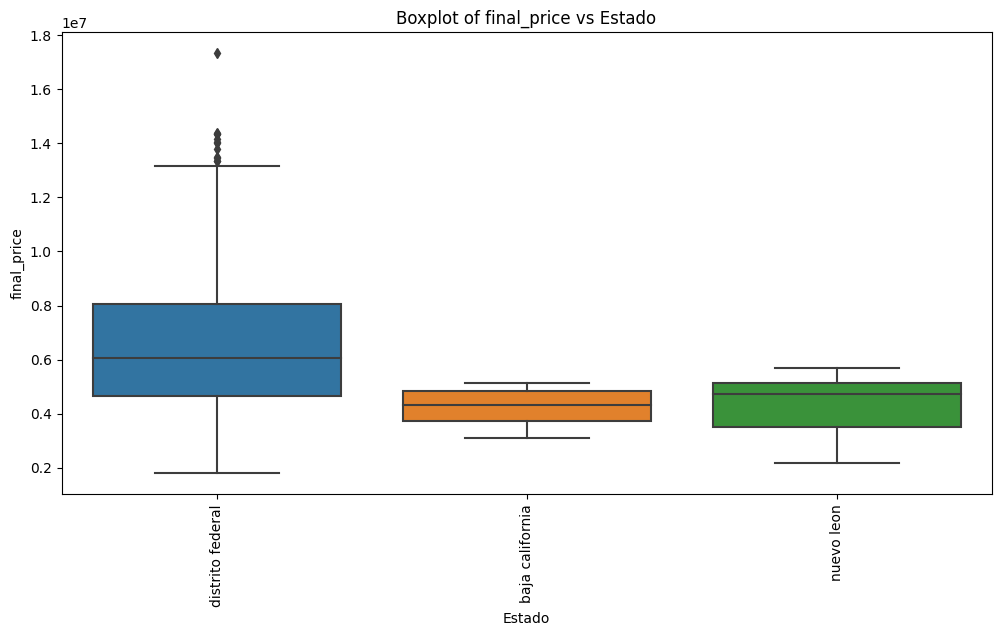

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['vendor', 'colonia', 'Estado']  # List of your categorical variables
target_column = 'final_price'  # Your target variable

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y=target_column, data=raw_data)  # replace 'your_dataframe' with your actual DataFrame
    plt.xticks(rotation=90)  # Useful if you have many categories
    plt.title(f'Boxplot of {target_column} vs {column}')
    plt.show()


Personalmente no me convence dejar la columna Vendor, pero lo voy a probar con y sin ella.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [841]:
import pandas as pd
from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols=['vendor'])

encoded_vendor = target_encoder.fit_transform(raw_data['vendor'], raw_data['final_price'])

raw_data['vendor_encoded'] = encoded_vendor

In [842]:
colonia_encoded = pd.get_dummies(raw_data['colonia'])
estado_econded = pd.get_dummies(raw_data['Estado'])
vendor_encoded = pd.get_dummies(raw_data['vendor'])

clean_data = pd.concat([colonia_encoded, estado_econded, raw_data, vendor_encoded], axis=1)

In [843]:
clean_data.drop(['colonia', 'Estado', 'vendor', 'vendor_encoded'], inplace = True, axis=1)

In [844]:
clean_data.head()

,baja california,otra,roma,roma norte,roma_sur,baja california,distrito federal,nuevo leon,lat,lon,...,Sara Goldhaber,Sata7784633,Spacio Bienesraices,Sspropiedades,Tucasahoy,Urp Propiedades,Veronica Porraz,Via Inmuebles,Xlife Real Estate,Zona Ryg
0,0,0,0,0,1,0,1,0,19.421317,-99.164182,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,19.421029,-99.163541,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,19.404992,-99.160243,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,19.419693,-99.156036,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,19.403020,-99.168700,...,0,0,0,0,0,0,0,0,0,0


In [845]:
from sklearn.model_selection import train_test_split
X = clean_data.drop('final_price', axis=1)
y = clean_data['final_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(403, 93)
(101, 93)


In [846]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
print(f"Decision Tree RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {tree_model.score(x_test,y_test)}")

Decision Tree RMSE: 1837540.5211654713
Score: 0.4839563069014037


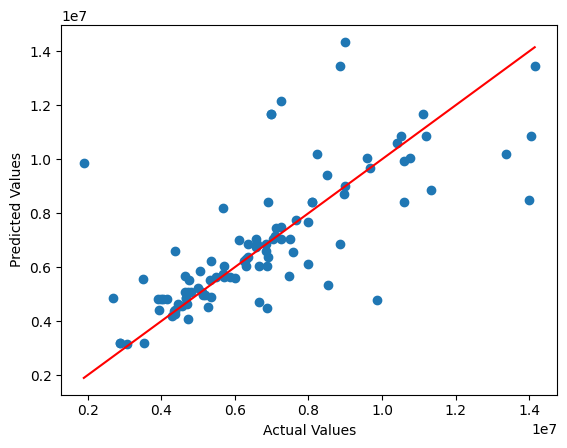

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
print(f"Linear Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {linear_model.score(x_test,y_test)}")

Linear Regression RMSE: 7.657538070368386e+18
Score: -8.961711405115912e+24


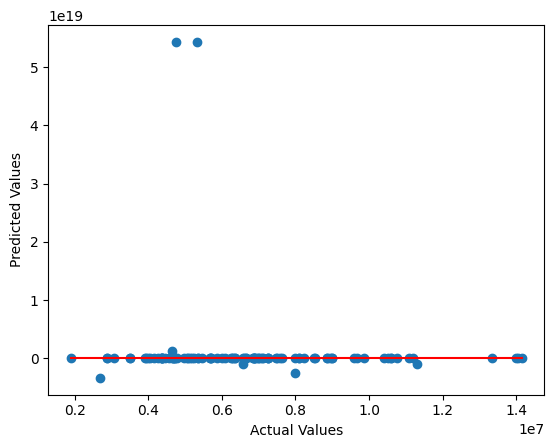

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)

y_pred = forest_model.predict(x_test)
print(f"Random Forest RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {forest_model.score(x_test,y_test)}")

Random Forest RMSE: 1393302.1545798318
Score: 0.7033097720099019


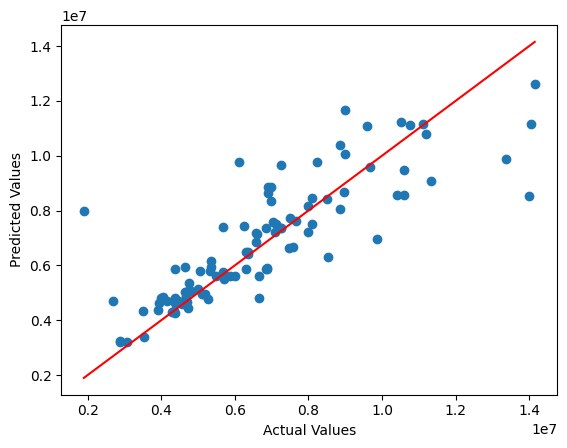

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

xGb = GradientBoostingRegressor()
xGb.fit(x_train, y_train)

y_pred = xGb.predict(x_test)
print(f"xGBoost RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {xGb.score(x_test,y_test)}")

xGBoost RMSE: 1443315.8831858123
Score: 0.6816276033561026


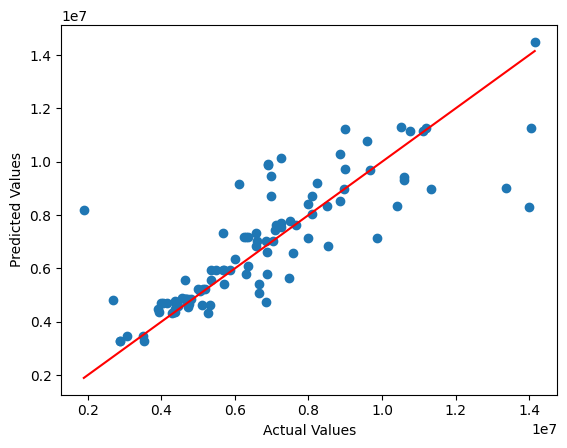

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [837]:
def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [847]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from sklearn.metrics import r2_score

nn_model = Sequential()
nn_model.add(Dense(512, activation=LeakyReLU(alpha=0.05), input_dim=x_train.shape[1]))

nn_model.add(Dense(256, activation=LeakyReLU(alpha=0.05)))

nn_model.add(Dense(128, activation=LeakyReLU(alpha=0.05)))
nn_model.add(Dense(128, activation='relu'))

nn_model.add(Dropout(0.2))

nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=0)

y_pred = nn_model.predict(x_test)
print(f"Neural Network RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f'Score : {r2_score(y_test, y_pred)}')
print(f'MAPE: {MAPE(y_test,y_pred)}')

4/4 [==============================] - 0s 4ms/step
Neural Network RMSE: 1247063.1706461417
Score : 0.7067915215948577
MAPE: 43.00613734632785


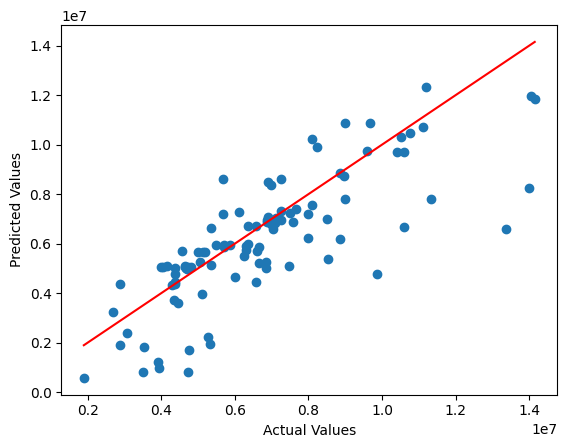

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, SGDRegressor

In [ ]:
ridge_model = Ridge(alpha=5)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)
print(f"Ridge Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Ridge Score: {ridge_model.score(x_test, y_test)}")

Ridge Regression RMSE: 1435180.8194495777
Ridge Score: 0.6839019834547506


In [ ]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-1)
sgd_model.fit(x_train, y_train)

y_pred = sgd_model.predict(x_test)
print(f"SGDRegressor RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"SGDRegressor Score: {sgd_model.score(x_test, y_test)}")

SGDRegressor RMSE: 1443317.0801774205
SGDRegressor Score: 0.6803078077712206


# Sin Vendor

In [882]:
clean_data = pd.concat([colonia_encoded, estado_econded, raw_data], axis=1)

In [883]:
clean_data.columns

Index(['baja california', 'otra', 'roma', 'roma norte', 'roma_sur',
       'baja california', 'distrito federal', 'nuevo leon', 'vendor', 'lat',
       'lon', 'days_on_site', 'amenities', 'bathrooms', 'parking_lots',
       'num_bedrooms', 'm2', 'final_price', 'colonia', 'Estado',
       'vendor_encoded'],
      dtype='object')

In [884]:
clean_data.drop(['vendor','vendor_encoded', 'colonia', 'Estado'], axis=1, inplace=True)

In [885]:
X = clean_data.drop('final_price', axis=1)
y = clean_data['final_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(403, 16)
(101, 16)


In [886]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [887]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
print(f"Linear Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {linear_model.score(x_test,y_test)}")

Linear Regression RMSE: 1552073.3739361858
Score: 0.6542557967446875


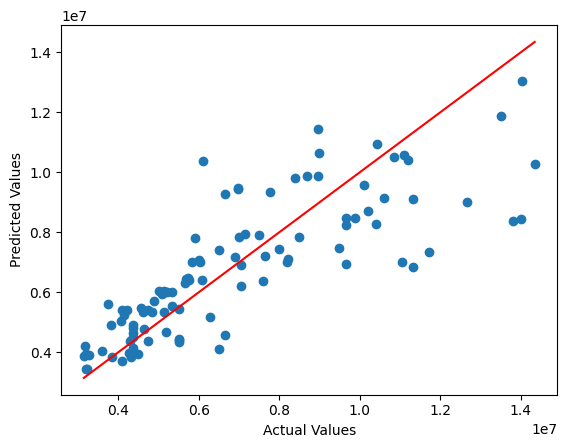

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
print(f"Decision Tree RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {tree_model.score(x_test,y_test)}")

Decision Tree RMSE: 1683956.7702993343
Score: 0.6561862285004276


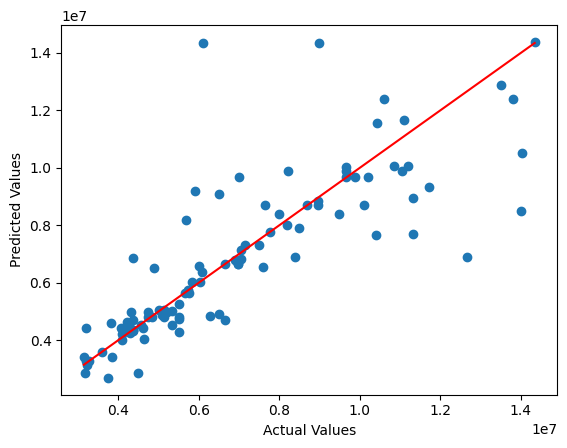

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [888]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)

y_pred = forest_model.predict(x_test)
print(f"Random Forest RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {forest_model.score(x_test,y_test)}")
print(f'Mape: {MAPE(y_test,y_pred)}')

Random Forest RMSE: 1311533.0900349047
Score: 0.75311829106116
Mape: 13.925476387337623


In [889]:
from sklearn.ensemble import GradientBoostingRegressor

xGb = GradientBoostingRegressor()
xGb.fit(x_train, y_train)

y_pred = xGb.predict(x_test)
print(f"xGBoost RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Score: {xGb.score(x_test,y_test)}")
print(f'Mape: {MAPE(y_test,y_pred)}')

xGBoost RMSE: 1233077.3339704867
Score: 0.7817717149219001
Mape: 14.03527233641312


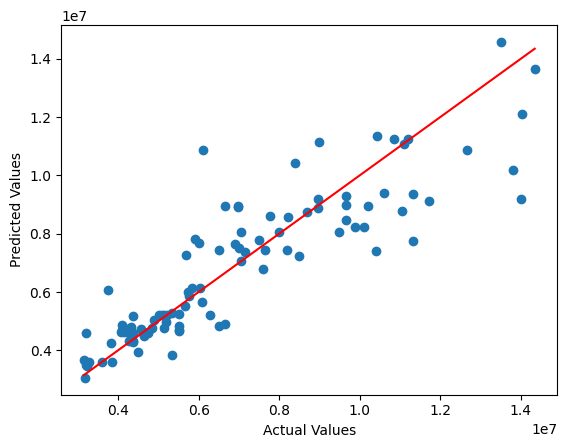

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [854]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from sklearn.metrics import r2_score

nn_model = Sequential()
nn_model.add(Dense(512, activation=LeakyReLU(alpha=0.05), input_dim=x_train.shape[1]))

nn_model.add(Dense(256, activation=LeakyReLU(alpha=0.05)))

nn_model.add(Dense(128, activation=LeakyReLU(alpha=0.05)))
nn_model.add(Dense(128, activation='relu'))

nn_model.add(Dropout(0.2))

nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=0)

# Predict and evaluate
y_pred = nn_model.predict(x_test)
print(f"Neural Network RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f'Score : {r2_score(y_test, y_pred)}')
print(f'MAPE: {MAPE(y_test,y_pred)}')

4/4 [==============================] - 0s 4ms/step
Neural Network RMSE: 1447038.9718517647
Score : 0.6307793464368735
MAPE: 44.46824230599247


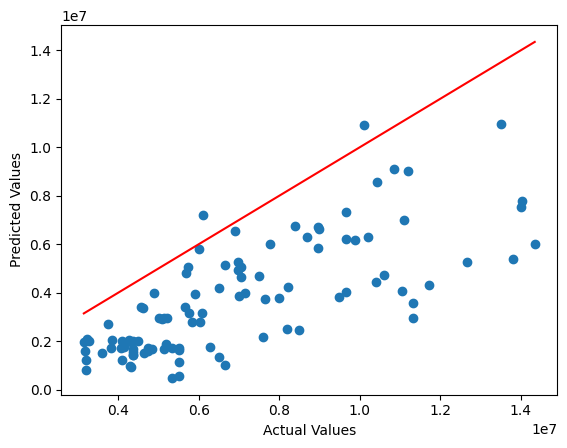

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line where y=x, for reference
plt.show()

In [ ]:
ridge_model = Ridge(alpha=5)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)
print(f"Ridge Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Ridge Score: {ridge_model.score(x_test, y_test)}")

Ridge Regression RMSE: 1669394.5892426444
Ridge Score: 0.6052105451044266


In [ ]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-1)
sgd_model.fit(x_train, y_train)

y_pred = sgd_model.predict(x_test)
print(f"SGDRegressor RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"SGDRegressor Score: {sgd_model.score(x_test, y_test)}")

SGDRegressor RMSE: 1666543.1646112201
SGDRegressor Score: 0.6065580407672564


# Pruebas de Hiperparametros y Arquitecturas

## Hasta ahora los más prometedores fueron:


#### Con Vendor:


1.   Random Forest
2.   Ridge
3. xGBoost
4. Red Neuronal
5. SGD

#### Sin Vendor:
1. Random Forest
2. xGBoost
3. LinearRegression
4. Decision Tree





In [873]:
colonia_encoded = pd.get_dummies(raw_data['colonia'])
estado_econded = pd.get_dummies(raw_data['Estado'])
vendor_encoded = pd.get_dummies(raw_data['vendor'])

con_vendor = pd.concat([colonia_encoded, estado_econded, raw_data, vendor_encoded], axis=1)

In [874]:
con_vendor.drop(['colonia', 'Estado', 'vendor', 'vendor_encoded'], inplace = True, axis=1)

In [875]:
from sklearn.model_selection import train_test_split
X = con_vendor.drop('final_price', axis=1)
y = con_vendor['final_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(403, 93)
(101, 93)


In [876]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [877]:
def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [878]:
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X, y, x_test, y_test):
    algos = {
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 5, 10],
                'min_samples_leaf':[1,3,5,10],
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 0.1, 0.01, 0.001],
            }
        },
        'XGBoost': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 150, 200],
                'learning_rate': [0.2, 0.15, 0.1, 0.01, 0.001],
            }
        },
        'SGD': {
            'model': SGDRegressor(),
            'params': {
                'max_iter': [1000, 5000, 10000],
                'tol': [1e-1, 1e-1, 1e-3, 1e-4, 1e-5],
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        y_pred = gs.predict(x_test)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
            'MAPE': MAPE(y_test, y_pred),
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'RMSE', 'MAPE'])

vendor_models = find_best_model_using_gridsearchcv(x_train, y_train, x_test, y_test)
vendor_models.to_excel("vendor.xlsx")

In [879]:
sin_vendor = con_vendor = pd.concat([colonia_encoded, estado_econded, raw_data], axis=1)
sin_vendor.drop(['colonia', 'Estado', 'vendor', 'vendor_encoded'], inplace = True, axis=1)

from sklearn.model_selection import train_test_split
X = sin_vendor.drop('final_price', axis=1)
y = sin_vendor['final_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

(403, 16)
(101, 16)


In [880]:
nonvendor_models = find_best_model_using_gridsearchcv(x_train, y_train, x_test, y_test)
nonvendor_models.to_excel("nonvendor.xlsx")

In [901]:
xg = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 200)
xg.fit(x_train, y_train)

importances = xg.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df.reset_index(drop=True)

print("Feature ranking:")
for i in range(importance_df.shape[0]):
    print(f"Feature {importance_df.loc[i, 'Feature']}, Importance: {importance_df.loc[i, 'Importance']}")


Feature ranking:
Feature m2, Importance: 0.6983350146232654
Feature lat, Importance: 0.08197443807860617
Feature lon, Importance: 0.043346726583167794
Feature parking_lots, Importance: 0.04120724901833418
Feature amenities, Importance: 0.03861466230523558
Feature num_bedrooms, Importance: 0.019147254714339583
Feature days_on_site, Importance: 0.0185704303112272
Feature bathrooms, Importance: 0.018157972427827008
Feature roma norte, Importance: 0.017456061100212267
Feature nuevo leon, Importance: 0.009203313459046491
Feature distrito federal, Importance: 0.008563296555985209
Feature roma, Importance: 0.0045064068044730395
Feature roma_sur, Importance: 0.000887214736197684
Feature otra, Importance: 2.9959282082431492e-05
Feature baja california, Importance: 0.0
Feature baja california, Importance: 0.0


In [902]:
rf = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, n_estimators= 150)
rf.fit(x_train, y_train)

importances = rf.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df.reset_index(drop=True)

print("Feature ranking:")
for i in range(importance_df.shape[0]):
    print(f"Feature {importance_df.loc[i, 'Feature']}, Importance: {importance_df.loc[i, 'Importance']}")

Feature ranking:
Feature m2, Importance: 0.709518093242232
Feature lon, Importance: 0.06632210821790104
Feature lat, Importance: 0.061022563266130224
Feature days_on_site, Importance: 0.03872989584200082
Feature amenities, Importance: 0.03745586305572415
Feature parking_lots, Importance: 0.023692265747461312
Feature bathrooms, Importance: 0.015528931423818252
Feature num_bedrooms, Importance: 0.011587384282209205
Feature roma norte, Importance: 0.010552725454537823
Feature distrito federal, Importance: 0.007865861953335388
Feature roma, Importance: 0.0065388329824567085
Feature nuevo leon, Importance: 0.005794599973684581
Feature roma_sur, Importance: 0.004559157917662823
Feature otra, Importance: 0.0005679365650354097
Feature baja california, Importance: 0.00024202532070954062
Feature baja california, Importance: 2.1754755100681833e-05
